In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import re

In [381]:
box_office_data1 = pd.read_csv("2000-2009 Movies Box Ofice Collection.csv")
box_office_data2 = pd.read_csv("2010-2024 Movies Box Ofice Collection.csv")
box_office_data3 = pd.read_csv("2024 Movies Box Ofice Collection.csv")
imdb_data_1 = pd.read_csv("imdb_movies.csv")
imdb_data_2 = pd.read_csv("IMDB_Movies_Dataset.csv")

In [358]:
box_office_data = pd.concat([box_office_data1, box_office_data2, box_office_data3]).reset_index(drop=True)

In [359]:
box_office_data = box_office_data.iloc[: , 1:]
box_office_data = box_office_data.drop(columns = ['Rank'])

In [360]:
box_office_data

,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
0,Mission: Impossible II,"54,63,88,108","21,54,09,889",39.40%,"33,09,78,219",60.60%,2000
1,Gladiator,"46,05,83,960","18,77,05,427",40.80%,"27,28,78,533",59.20%,2000
2,Cast Away,"42,96,32,142","23,36,32,142",54.40%,"19,60,00,000",45.60%,2000
3,What Women Want,"37,41,11,707","18,28,11,707",48.90%,"19,13,00,000",51.10%,2000
4,Dinosaur,"34,98,22,765","13,77,48,063",39.40%,"21,20,74,702",60.60%,2000
...,...,...,...,...,...,...,...
4995,Buzz House: The Movie,"29,10,112",0,0,"29,10,112",100%,2024
4996,We 12,"28,64,154",0,0,"28,64,154",100%,2024
4997,Me Contro Te - Il film: Operazione Spie,"27,98,501",0,0,"27,98,501",100%,2024
4998,Menudas piezas,"27,78,043",0,0,"27,78,043",100%,2024


In [361]:
box_office_data['Year'] = box_office_data['year'] 

In [362]:
imdb_data_1.drop(columns = ['overview', 'status'])

,names,date_x,score,genre,crew,orig_title,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...","Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,English,116000000.0,4.756613e+08,US


## cleaning titles and dates to years

In [363]:
imdb_data_1['date_x'] = imdb_data_1['date_x'].apply(lambda x: x.strip())

In [364]:
imdb_data_1['date_x'] = pd.to_datetime(imdb_data_1['date_x'], format = '%m/%d/%Y')

In [365]:
imdb_data_1['date_x']

0       2023-03-02
1       2022-12-15
2       2023-04-05
3       2023-01-05
4       2023-03-17
           ...    
10173   2016-12-28
10174   1990-08-24
10175   1990-12-21
10176   1995-07-11
10177   2020-07-20
Name: date_x, Length: 10178, dtype: datetime64[ns]

In [366]:
imdb_data_1['Year'] = imdb_data_1['date_x'].dt.year

In [367]:
imdb_data_1['Year'] = imdb_data_1['Year'] .astype('int64')

In [368]:
imdb_data_1['Year'][0]

np.int64(2023)

In [369]:
def extract_year(date):
    return re.findall(r'\b\d{4}\b', date)[0]

In [370]:
def clean_title(title):
    return re.sub(r'[^a-zA-Z0-9]', '', title).lower()

In [371]:

imdb_data_1['title'] = imdb_data_1['names'].apply(clean_title)


In [372]:
box_office_data['title'] = box_office_data['Release Group'].apply(clean_title)

In [377]:
df = imdb_data_1.merge(box_office_data, on=['title', 'Year'], how = 'inner')

In [378]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country', 'Year',
       'title', 'Release Group', 'Worldwide', 'Domestic', 'Domestic_percent',
       'Foreign', 'Foreign_percent', 'year'],
      dtype='object')

In [379]:
df = df.drop(columns = ['revenue', 'status', 'Year', 'overview', 'title', 'Release Group', 'year'])

In [380]:
df

,names,date_x,score,genre,crew,orig_title,orig_lang,budget_x,country,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent
0,Creed III,2023-03-02,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,English,75000000.0,AU,"27,61,48,615","15,62,48,615",56.60%,"11,99,00,000",43.40%
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,English,460000000.0,AU,"2,32,02,50,281","68,40,75,767",29.50%,"1,63,61,74,514",70.50%
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,English,100000000.0,AU,"1,36,19,92,475","57,49,34,330",42.20%,"78,70,58,145",57.80%
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,"Spanish, Castilian",12300000.0,AU,"5,44,75,970","42,75,970",7.80%,"5,02,00,000",92.20%
4,Cocaine Bear,2023-02-23,66.0,"Thriller, Comedy, Crime","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,English,35000000.0,AU,"8,83,14,672","6,46,70,240",73.20%,"2,36,44,432",26.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,Brüno,2009-07-08,56.0,Comedy,"Sacha Baron Cohen, Brüno, Gustaf Hammarsten, L...",Brüno,English,42000000.0,AU,"13,88,05,831","6,00,54,530",43.30%,"7,87,51,301",56.70%
2373,Hustle & Flow,2005-07-22,71.0,"Crime, Drama, Music","Terrence Howard, Djay, Anthony Anderson, Key, ...",Hustle & Flow,English,2800000.0,US,"2,35,63,727","2,22,02,809",94.20%,"13,60,918",5.80%
2374,Hardball,2001-09-14,64.0,Drama,"Keanu Reeves, Conor O'Neill, Diane Lane, Eliza...",Hardball,English,21000000.0,US,"4,41,02,389","4,02,22,729",91.20%,"38,79,660",8.80%
2375,K.G.F: Chapter 2,2022-04-14,76.0,"Action, Crime, Drama","Yash, Raja Krishnappa Bairya 'Rocky', Sanjay D...",ಕೆ.ಜಿ.ಎಫ್: Chapter 2,Kannada,13000000.0,IN,"8,91,23,940","28,74,000",3.20%,"8,62,49,940",96.80%


# ideas of what to do with data
- A list actors
- use features to predict the worldwide 
- use genres as categorical features (pd.get_dummies or whatever)


In [ ]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country', 'Year',
       'title', 'Release Group', 'Worldwide', 'Domestic', 'Domestic_percent',
       'Foreign', 'Foreign_percent', 'year'],
      dtype='object')

In [ ]:
df['Worldwide'] = df['Worldwide'].apply(lambda x : x.replace(',','')).astype('float64')

In [ ]:
df[['revenue', 'Worldwide', 'title','Year']].head(10)

,revenue,Worldwide,title,Year
0,2.716167e+08,2.761486e+08,creediii,2023
1,2.316795e+09,2.320250e+09,avatarthewayofwater,2022
2,7.244590e+08,1.361992e+09,thesupermariobrosmovie,2023
3,3.420000e+07,5.447597e+07,mummies,2023
4,8.000000e+07,8.831467e+07,cocainebear,2023
5,3.513494e+08,4.401572e+08,johnwickchapter4,2023
6,4.834806e+08,4.817268e+08,pussinbootsthelastwish,2022
7,8.540411e+08,8.592088e+08,blackpantherwakandaforever,2022
8,4.622165e+08,7.698762e+07,thepopesexorcist,2023
9,5.462950e+07,5.476095e+07,knockatthecabin,2023


In [ ]:
df[df['revenue'] != df['Worldwide']]

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,country,Year,title,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,AU,2023,creediii,Creed III,2.761486e+08,"15,62,48,615",56.60%,"11,99,00,000",43.40%,2023
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,AU,2022,avatarthewayofwater,Avatar: The Way of Water,2.320250e+09,"68,40,75,767",29.50%,"1,63,61,74,514",70.50%,2022
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,AU,2023,thesupermariobrosmovie,The Super Mario Bros. Movie,1.361992e+09,"57,49,34,330",42.20%,"78,70,58,145",57.80%,2023
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,AU,2023,mummies,Mummies,5.447597e+07,"42,75,970",7.80%,"5,02,00,000",92.20%,2023
4,Cocaine Bear,2023-02-23,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,...,AU,2023,cocainebear,Cocaine Bear,8.831467e+07,"6,46,70,240",73.20%,"2,36,44,432",26.80%,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,Brüno,2009-07-08,56.0,Comedy,Flamboyantly gay Austrian television reporter ...,"Sacha Baron Cohen, Brüno, Gustaf Hammarsten, L...",Brüno,Released,English,42000000.0,...,AU,2009,brno,Brüno,1.388058e+08,"6,00,54,530",43.30%,"7,87,51,301",56.70%,2009
2373,Hustle & Flow,2005-07-22,71.0,"Crime, Drama, Music","With help from his friends, a Memphis pimp in ...","Terrence Howard, Djay, Anthony Anderson, Key, ...",Hustle & Flow,Released,English,2800000.0,...,US,2005,hustleflow,Hustle & Flow,2.356373e+07,"2,22,02,809",94.20%,"13,60,918",5.80%,2005
2374,Hardball,2001-09-14,64.0,Drama,"An aimless young man who is scalping tickets, ...","Keanu Reeves, Conor O'Neill, Diane Lane, Eliza...",Hardball,Released,English,21000000.0,...,US,2001,hardball,Hardball,4.410239e+07,"4,02,22,729",91.20%,"38,79,660",8.80%,2001
2375,K.G.F: Chapter 2,2022-04-14,76.0,"Action, Crime, Drama",The blood-soaked land of Kolar Gold Fields (KG...,"Yash, Raja Krishnappa Bairya 'Rocky', Sanjay D...",ಕೆ.ಜಿ.ಎಫ್: Chapter 2,Released,Kannada,13000000.0,...,IN,2022,kgfchapter2,K.G.F: Chapter 2,8.912394e+07,"28,74,000",3.20%,"8,62,49,940",96.80%,2022


In [323]:
imdb_data_1['revenue']

0        2.716167e+08
1        2.316795e+09
2        7.244590e+08
3        3.420000e+07
4        3.409420e+08
             ...     
10173    9.353729e+06
10174    6.698361e+06
10175    2.299799e+07
10176    4.756613e+08
10177    5.394018e+08
Name: revenue, Length: 10178, dtype: float64

In [326]:
box_office_data['Worldwide']

0       54,63,88,108
1       46,05,83,960
2       42,96,32,142
3       37,41,11,707
4       34,98,22,765
            ...     
4995       29,10,112
4996       28,64,154
4997       27,98,501
4998       27,78,043
4999       27,39,320
Name: Worldwide, Length: 5000, dtype: object

## Reference code for doing correlation analysis stuff

In [382]:
box_office_data['total_income'] = pd.to_numeric(box_office_data['Worldwide'].str.replace(',', ''), errors='coerce') if 'Worldwide' in box_office_data.columns else None
imdb_data_1['total_investment'] = pd.to_numeric(imdb_data_1['budget_x'], errors='coerce') if 'budget_x' in imdb_data_1.columns else None

merged_data = pd.merge(box_office_data, imdb_data_1, left_on='Release Group', right_on='names', how='outer')
merged_data = pd.merge(merged_data, imdb_data_2, left_on='Release Group', right_on='Title', how='outer')

In [383]:
if 'genre' in merged_data.columns:
    merged_data.rename(columns={'genre': 'genre_list'}, inplace=True)

merged_data['genre_list'] = merged_data['genre_list'].astype(str).str.split(',')
merged_data = merged_data.explode('genre_list')
merged_data['genre_list'] = merged_data['genre_list'].str.strip()

#delete
merged_data = merged_data.dropna(subset=['total_income', 'total_investment', 'genre_list'])


In [384]:
merged_data

,Release Group,Worldwide,Domestic,Domestic_percent,Foreign,Foreign_percent,year,Year,title,total_income,...,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
2,#Alive,"1,34,32,212",0,0,"1,34,32,212",100%,2020.0,2020.0,alive,13432212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Alive,"1,34,32,212",0,0,"1,34,32,212",100%,2020.0,2020.0,alive,13432212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Alive,"1,34,32,212",0,0,"1,34,32,212",100%,2020.0,2020.0,alive,13432212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Alive,"1,34,32,212",0,0,"1,34,32,212",100%,2020.0,2020.0,alive,13432212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10 Cloverfield Lane,"11,02,16,998","7,20,82,998",65.40%,"3,81,34,000",34.60%,2016.0,2016.0,10cloverfieldlane,110216998.0,...,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle",76.0,"John Goodman, Mary Elizabeth Winstead, John Ga...","March 11, 2016 (India)",United States,English,"$15,000,000 (estimated)","$110,216,998",1 hour 43 minutes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,xXx: State of the Union,"7,14,10,636","2,68,73,932",37.60%,"4,45,36,704",62.40%,2005.0,2005.0,xxxstateoftheunion,71410636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9564,xXx: State of the Union,"7,14,10,636","2,68,73,932",37.60%,"4,45,36,704",62.40%,2005.0,2005.0,xxxstateoftheunion,71410636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9568,Æon Flux,"5,33,21,673","2,58,74,337",48.50%,"2,74,47,336",51.50%,2005.0,2005.0,onflux,53321673.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9568,Æon Flux,"5,33,21,673","2,58,74,337",48.50%,"2,74,47,336",51.50%,2005.0,2005.0,onflux,53321673.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
correlation = merged_data.groupby('genre_list')[['total_income', 'total_investment']].corr().iloc[0::2, -1]
print("Correlation of income & investment:")
print(correlation)

Correlation of income & investment:
genre_list                   
Action           total_income    0.595279
Adventure        total_income    0.514599
Animation        total_income    0.384744
Comedy           total_income    0.516203
Crime            total_income    0.636290
Documentary      total_income    0.742159
Drama            total_income    0.505508
Family           total_income    0.555330
Fantasy          total_income    0.541335
History          total_income    0.755285
Horror           total_income    0.356135
Music            total_income    0.319147
Mystery          total_income    0.512385
Romance          total_income    0.371611
Science Fiction  total_income    0.628730
TV Movie         total_income    0.969566
Thriller         total_income    0.667187
War              total_income    0.619598
Western          total_income    0.851093
nan              total_income         NaN
Name: total_investment, dtype: float64


In [14]:
r_squared_results = {}

In [15]:
for genre in merged_data['genre_list'].unique():
    genre_data = merged_data[merged_data['genre_list'] == genre]
    
    X = genre_data['total_investment'].values.reshape(-1, 1)
    y = genre_data['total_income'].values

    if len(X) > 1: 
        model = LinearRegression()
        model.fit(X, y)
        r_squared = model.score(X, y)
        r_squared_results[genre] = r_squared

In [16]:
print("Coefficient of determination R²:")
for genre, r_sq in r_squared_results.items():
    print(f"{genre}: {r_sq:.4f}")

Coefficient of determination R²:
Adventure: 0.2648
Action: 0.3544
Drama: 0.2555
Fantasy: 0.2930
Family: 0.3084
Comedy: 0.2665
Romance: 0.1381
Horror: 0.1268
Mystery: 0.2625
Crime: 0.4049
Thriller: 0.4451
Science Fiction: 0.3953
War: 0.3839
Western: 0.7244
Music: 0.1019
Animation: 0.1480
TV Movie: 0.9401
History: 0.5705
Documentary: 0.5508


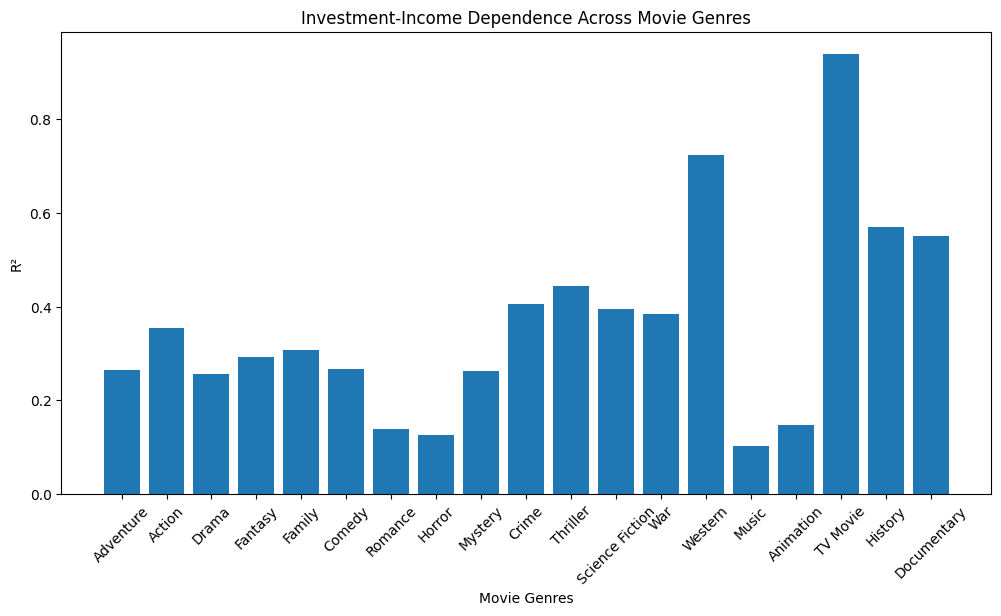

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(r_squared_results.keys(), r_squared_results.values())
plt.xlabel("Movie Genres")
plt.ylabel("R²")
plt.title("Investment-Income Dependence Across Movie Genres")
plt.xticks(rotation=45)
plt.show()